# Introduction

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems the gym faces is customer churn. In order to fight churn, Model Fitness has digitized a number of its customer profiles. My task is to analyze them and come up with a customer retention strategy.

## Data Outline

gym_churn_us.csv:

'Churn' — the fact of churn for the month in question

'gender'

'Near_Location' — whether the user lives or works in the neighborhood where the gym is located

'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

'Phone' — whether the user provided their phone number

'Age'

'Lifetime' — the time (in months) since the customer first came to the gym


'Contract_period' — 1 month, 3 months, 6 months, or 1 year

'Month_to_end_contract' — the months remaining until the contract expires

'Group_visits' — whether the user takes part in group sessions

'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime

'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month

'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

# Step 1: Downloading the dataset:

First, Let's download the liberies we need:

In [1]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

Let's download our dataset:

In [3]:
try:
    data = pd.read_csv(r'C:\Users\nadav\OneDrive\מסמכים\Practicum100\databases\gym_churn_us.csv')
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

We downloaded our dataset.

# Step 2: EDA

Before we make any calulations based on the data, let's evaluate it first:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Let's check for duplicates:

In [6]:
data.duplicated().sum()

0

First of all, We can see that we don't have any missing or duplicated values. Next, we see that all our data is numerical type. Next, we can see that nearly 85% of customers live near the gym, 48% of customers came through partner companies, 30% of customers signed through "bring a friend", 90% leave their phone number, and 41% attend group visits. We can also see that most customers have a contract period for 1 month, that the average age is 29 and most customers are around that age, That most customer's lifetime is around 3 months, and that the average visit per week is around 2. The Churn, which is our target variable, is 41%.

Let's group our data by customers who left and customers who didn't and check the averages:

In [7]:
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


We can see some major differences in the averages for the 2 groups. We see that people who come with friends, spend money, have a long conttrat and attend more classes are less likley to leave. We can see that people who have a short lifetime tend to leave more often as well.

Let's check the distributions of each feature in each group, and check the correlation:

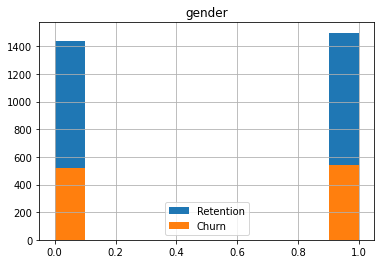

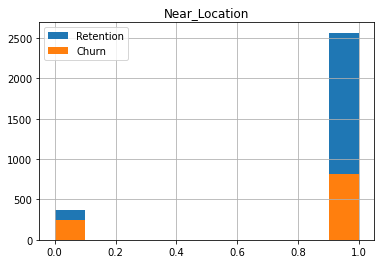

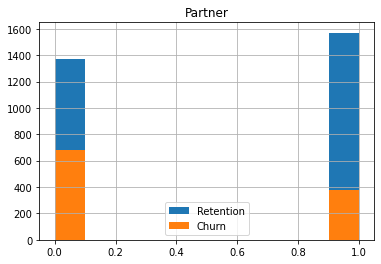

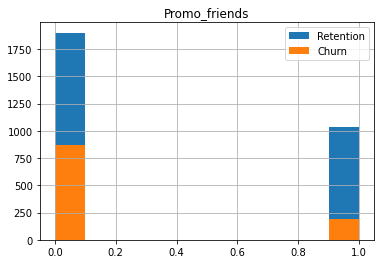

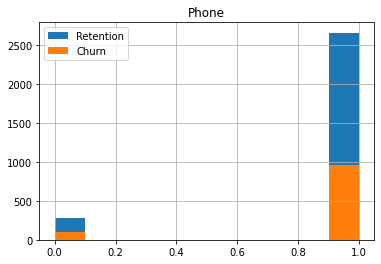

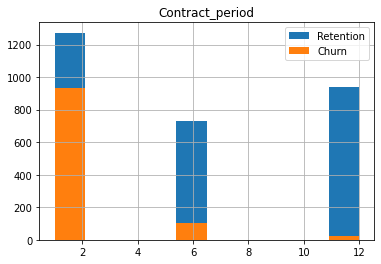

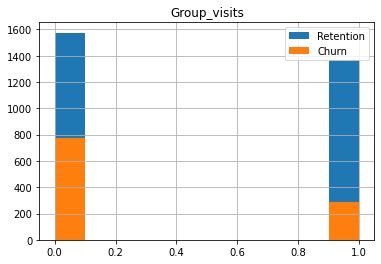

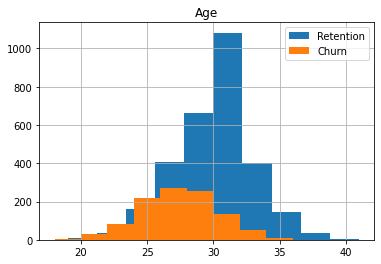

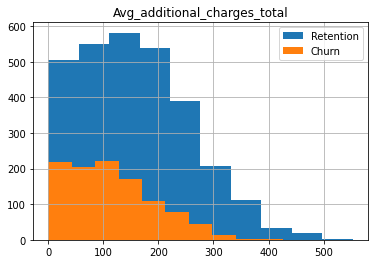

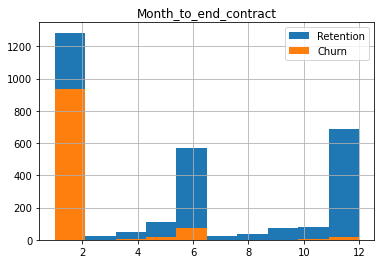

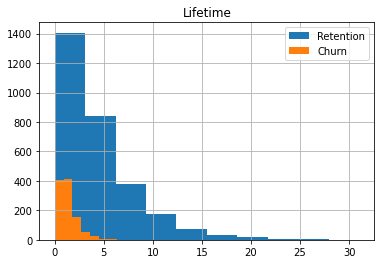

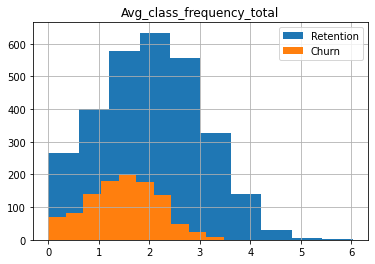

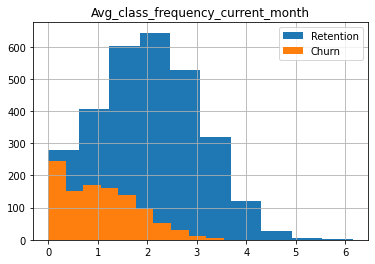

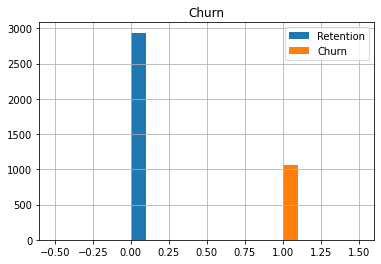

In [8]:
list = data.columns
for i in list:
    data.groupby('Churn')[i].hist()
    plt.legend(['Retention','Churn'])
    plt.title(i)
    plt.show();

We see we have outliners to the right, but not many of them. Let's define outliners as values greater than the 98 percentile. 

In [9]:
outline_col = ['Lifetime','Avg_class_frequency_current_month','Avg_class_frequency_total','Avg_additional_charges_total']
percentile_98 = []
for i in outline_col:
    percentile_98.append(np.percentile(data[i],98))
for i in range(len(outline_col)):
    data = data.loc[data[outline_col[i]] < percentile_98[i]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3748 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             3748 non-null   int64  
 1   Near_Location                      3748 non-null   int64  
 2   Partner                            3748 non-null   int64  
 3   Promo_friends                      3748 non-null   int64  
 4   Phone                              3748 non-null   int64  
 5   Contract_period                    3748 non-null   int64  
 6   Group_visits                       3748 non-null   int64  
 7   Age                                3748 non-null   int64  
 8   Avg_additional_charges_total       3748 non-null   float64
 9   Month_to_end_contract              3748 non-null   float64
 10  Lifetime                           3748 non-null   int64  
 11  Avg_class_frequency_total          3748 non-null   float

We lost about 5% ofour data. Let's see how the distributions are looking now:

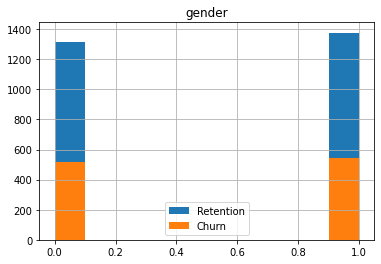

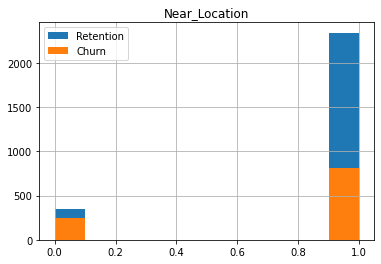

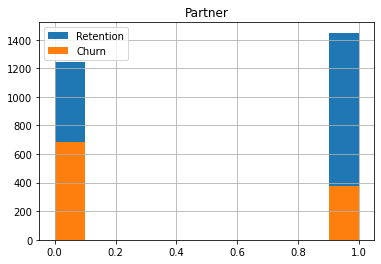

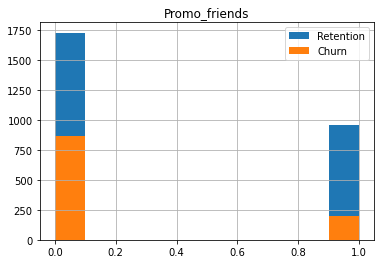

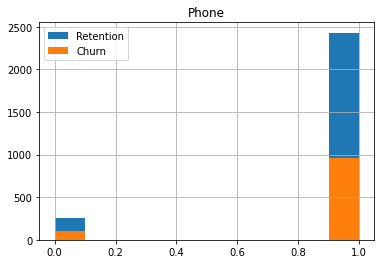

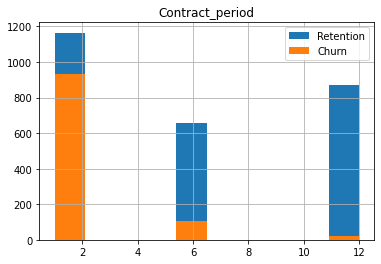

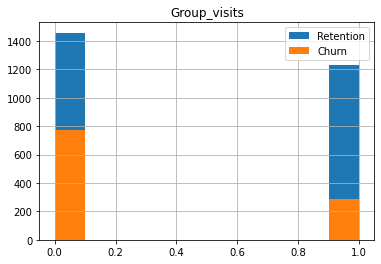

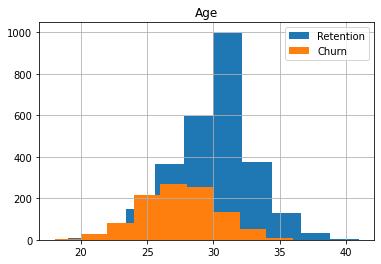

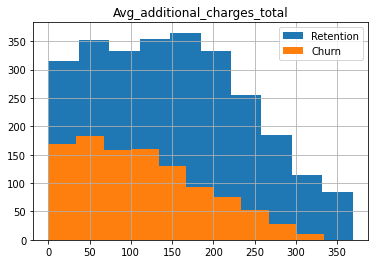

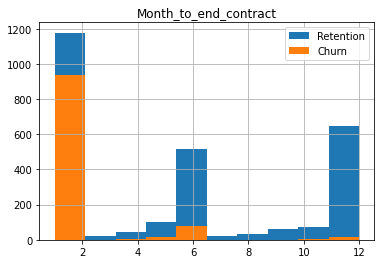

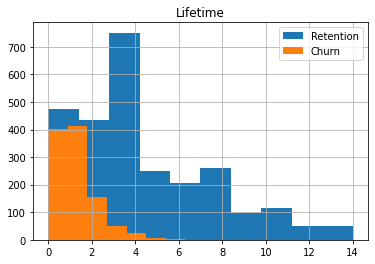

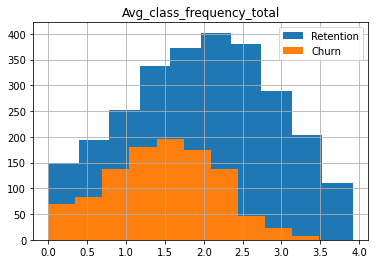

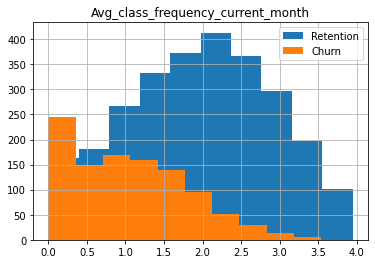

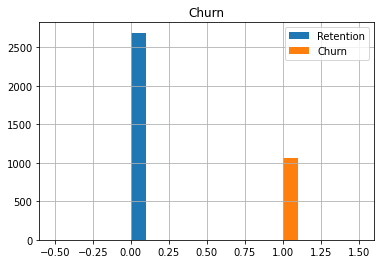

In [10]:
for i in list:
    data.groupby('Churn')[i].hist()
    plt.legend(['Retention','Churn'])
    plt.title(i)
    plt.show();

Much better! We can see a couple of interesting featurs for customers who left. First of all, Their contarct periods are much shorter than the customers that stayed. Secondly, the vast majority of them have only one month untill the end of the contract. This means customers contract's expire, and they don't extend it. Lastly, We can see that the average of class frequancy for the last month is relativly low compared to the staying customers.

Let's do a correlation matrix:

''

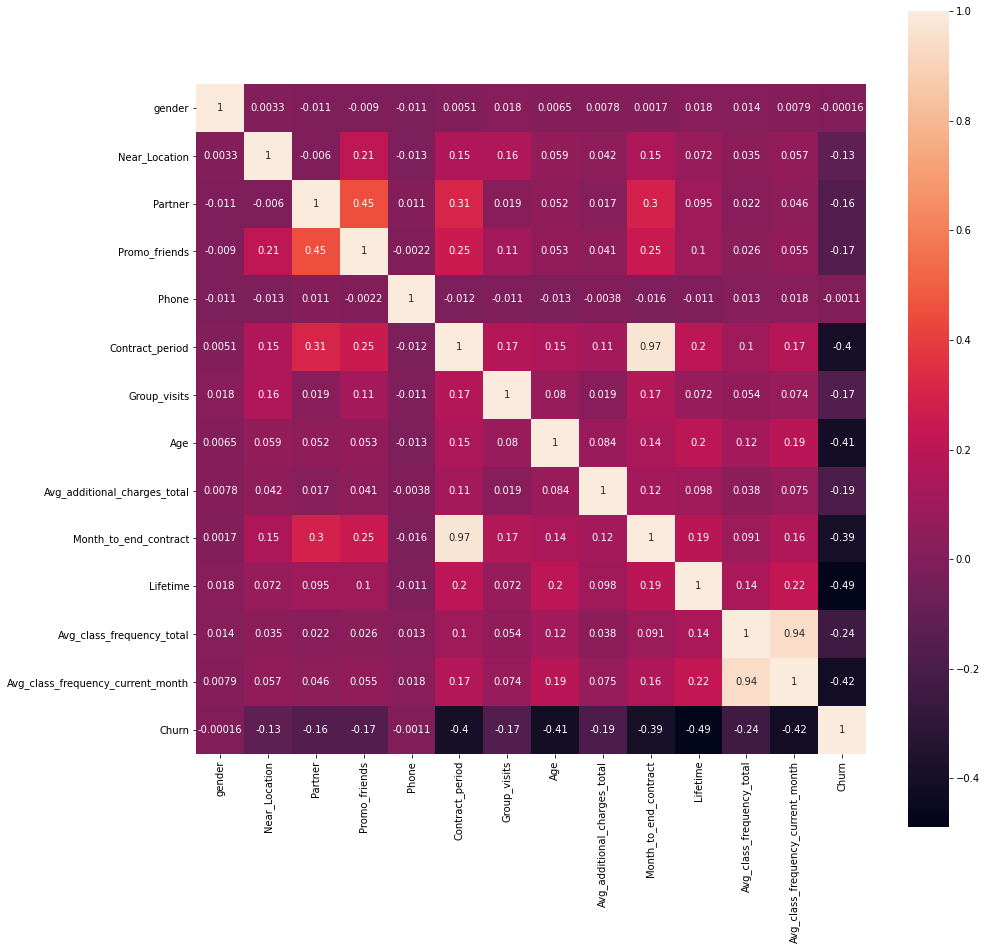

In [11]:
ax = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(ax, annot = True, square = True)
;

We have 2 pairs of columns that correlate neary identicly: 'contract period' with 'month untill the end of contract' and the average class frequancy in the total lifetime with the average class frequancy of this month. Both thease pairs makes sense, As they both have affect on each other. When we build our model, we'll get rid of the correlated columns.

# Step 3: Building a model

Let's build a model that predicts churn for any specific customer. First, let's split our data to features and target:

In [12]:
x = data.drop(['Contract_period','Avg_class_frequency_total','Churn'], axis = 1)
y = data['Churn']

Now let's split the data to train and test:

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

We will try and run a linear regression and tree models and see which one has better effiency. Let's try logistic regression first:

In [14]:
model = LogisticRegression(random_state = 0)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Logistic Regression:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Logistic Regression:
Accuracy: 0.87
Precision: 0.77
Recall: 0.76


C:\Users\nadav\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
tree_model = RandomForestClassifier(random_state = 0)
tree_model.fit(x_train,y_train)
predictions = tree_model.predict(x_test)
print("Forest:")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Forest:
Accuracy: 0.87
Precision: 0.77
Recall: 0.74


The 2 models are very close, but we can say that the linear model is just a bit better than the tree model. The most important metric for our task is precision, since we need to know the share of correct customers our model discovered out of all of the the customers it predicted to leave.

# Step 4: User clusters

Now let's build user clusters. To do that, we first need to standardize our data:

In [16]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

Let's create a dendogram to see how many clusters we should have:

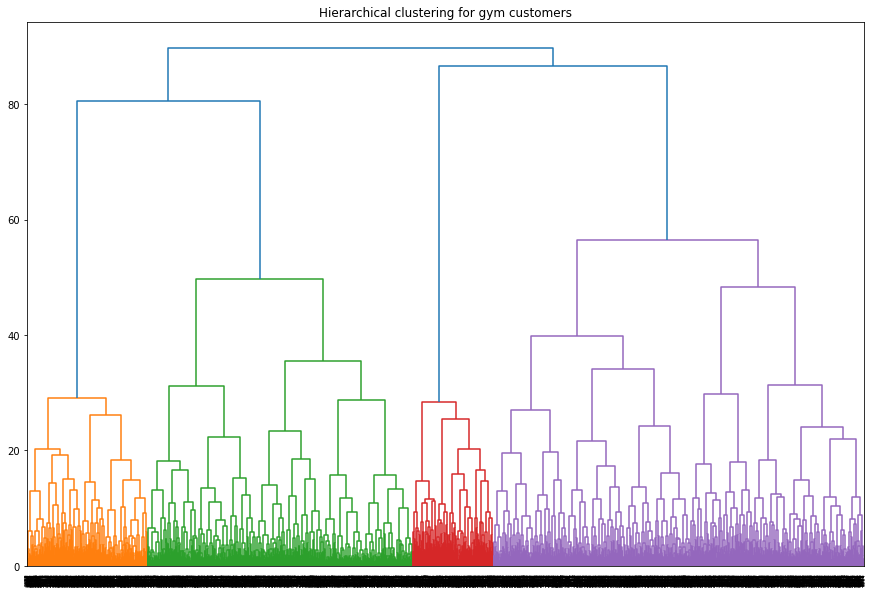

In [24]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym customers')
plt.show() 

We can see that our dendogram divides our data into 5 main clusters. The 2 right ones are very simillar, as they are connected in a relativly low point. Then we have our 2 left clusters, That connect at a higher point. And finally, we have the middle cluster, That connects with the 2 right ones at a very high point. So we can conclude that we have 2 clusters that are very simillar to each other, 2 clusters that are simillar to each other but very different from the other ones, and 1 more cluster that is relativly in the middle.

Let's define that we have 5 clusters. We'll add them to the table:

In [18]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(x_sc)
data['cluster'] = labels

Let's check the mean values and distribution for the clusters:

In [19]:
data.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.503788,0.000000,0.488636,0.073864,1.0,2.890152,0.221591,28.634470,132.563520,2.721591,2.740530,1.725982,1.551478,0.422348
1,0.489775,1.000000,0.277096,0.124744,1.0,2.123722,0.262781,27.359918,115.297461,1.997955,1.523517,1.371037,1.090684,0.634969
2,0.484515,0.992008,0.956044,0.831169,1.0,8.207792,0.515485,29.691309,147.214116,7.543457,4.137862,1.933132,1.904918,0.083916
3,0.563781,0.996583,0.192483,0.055809,1.0,4.329157,0.541002,30.776765,166.729569,3.984055,4.936219,2.274276,2.269217,0.030752
4,0.528926,0.856749,0.471074,0.311295,0.0,4.796143,0.421488,29.278237,141.898008,4.495868,3.484848,1.786728,1.647172,0.283747


gender :


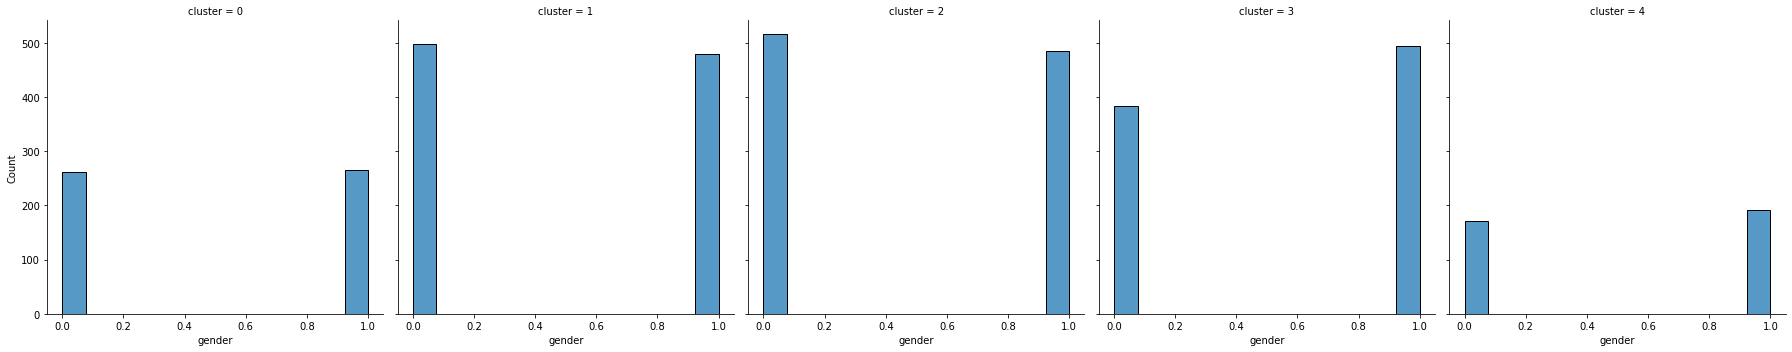

<Figure size 720x720 with 0 Axes>

Near_Location :


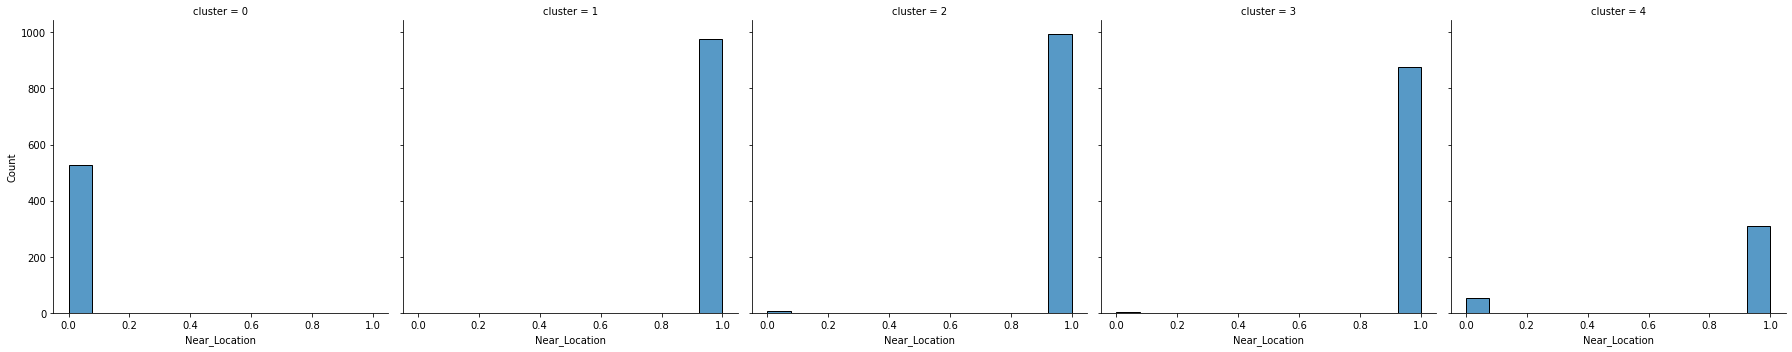

<Figure size 720x720 with 0 Axes>

Partner :


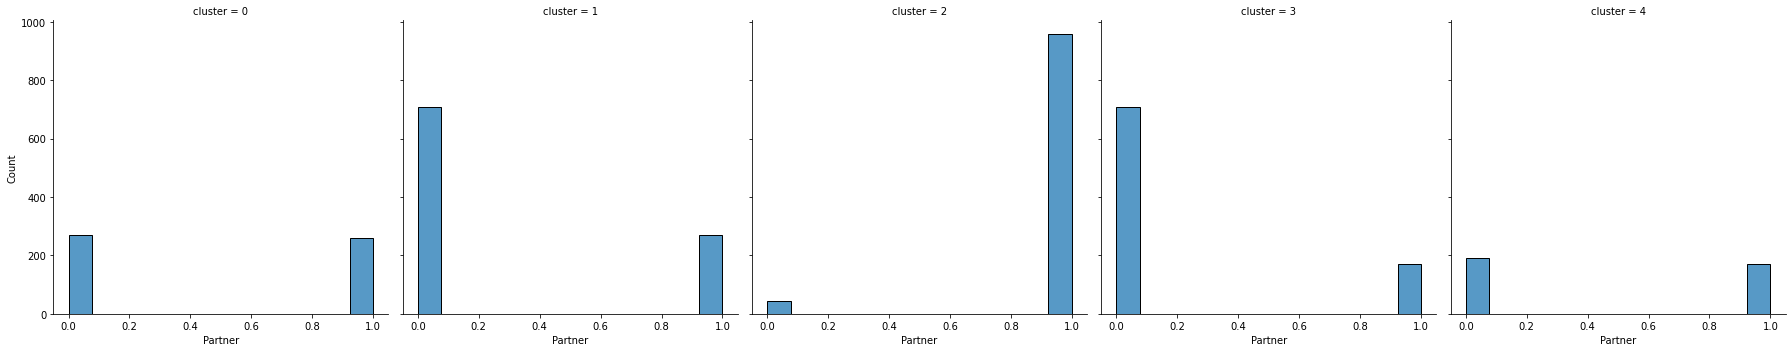

<Figure size 720x720 with 0 Axes>

Promo_friends :


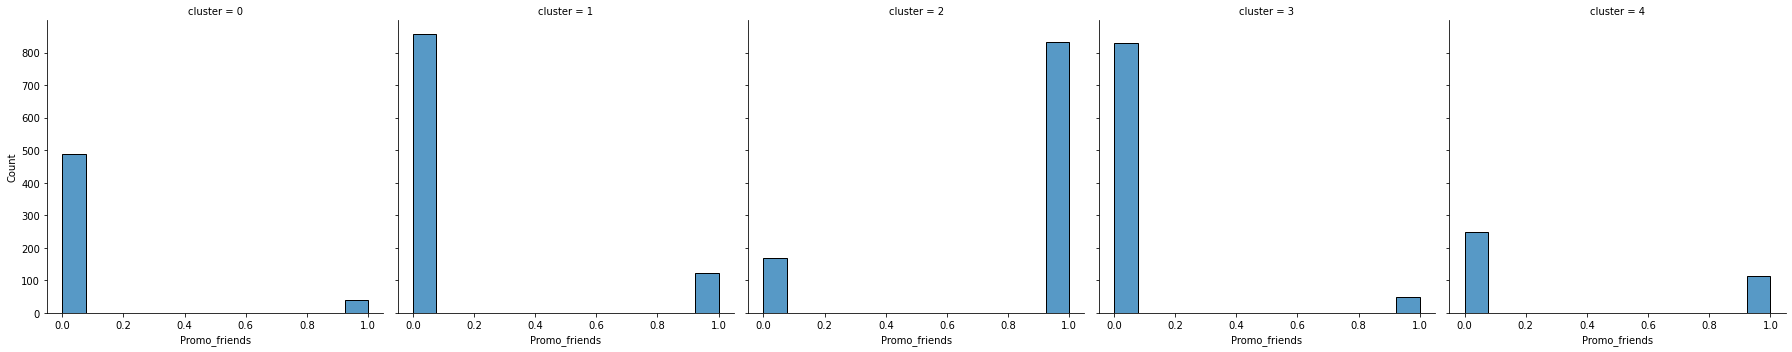

<Figure size 720x720 with 0 Axes>

Phone :


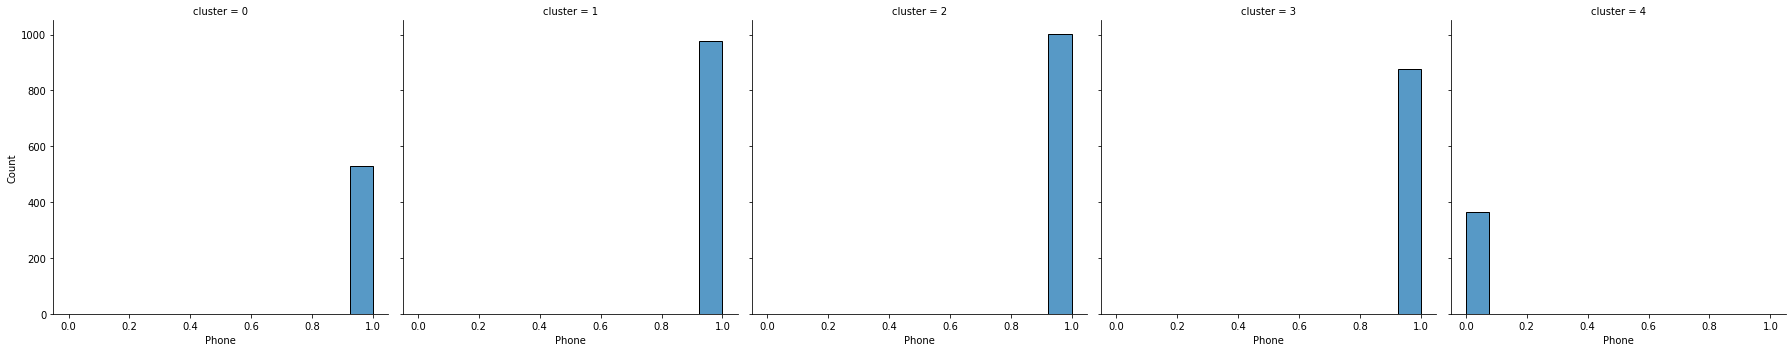

<Figure size 720x720 with 0 Axes>

Contract_period :


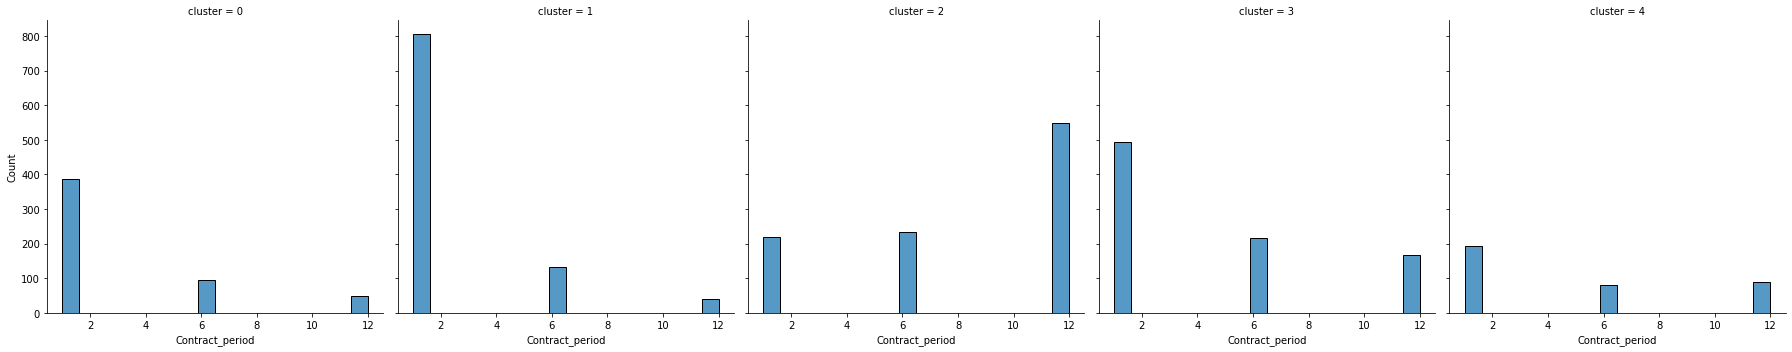

<Figure size 720x720 with 0 Axes>

Group_visits :


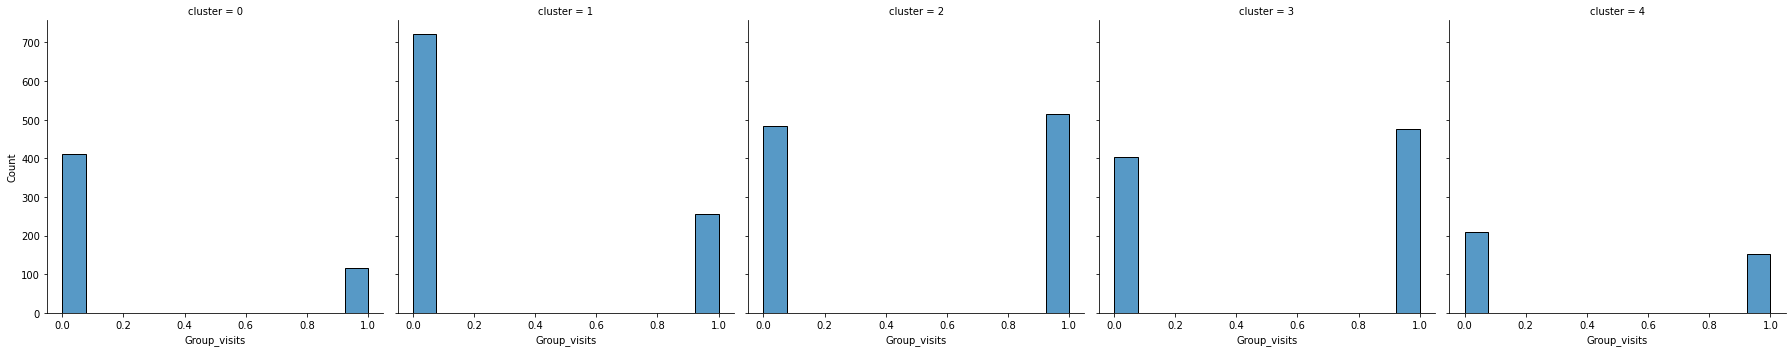

<Figure size 720x720 with 0 Axes>

Age :


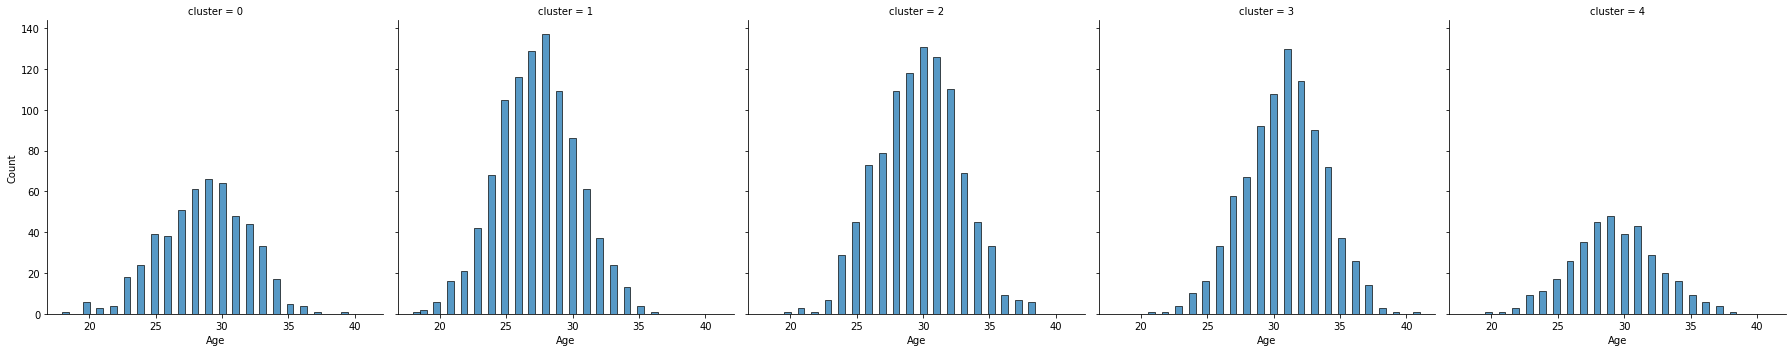

<Figure size 720x720 with 0 Axes>

Avg_additional_charges_total :


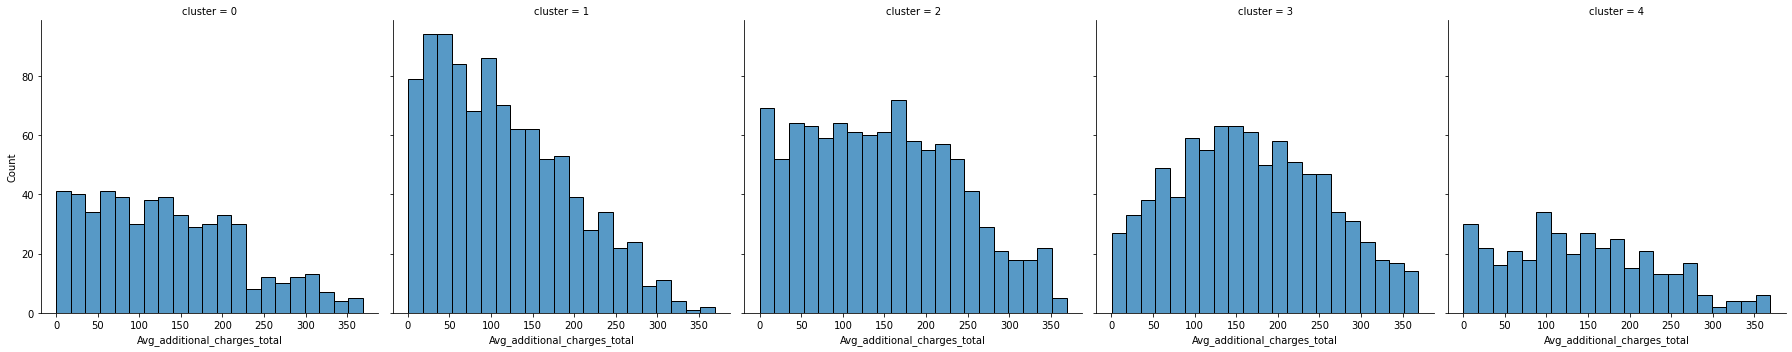

<Figure size 720x720 with 0 Axes>

Month_to_end_contract :


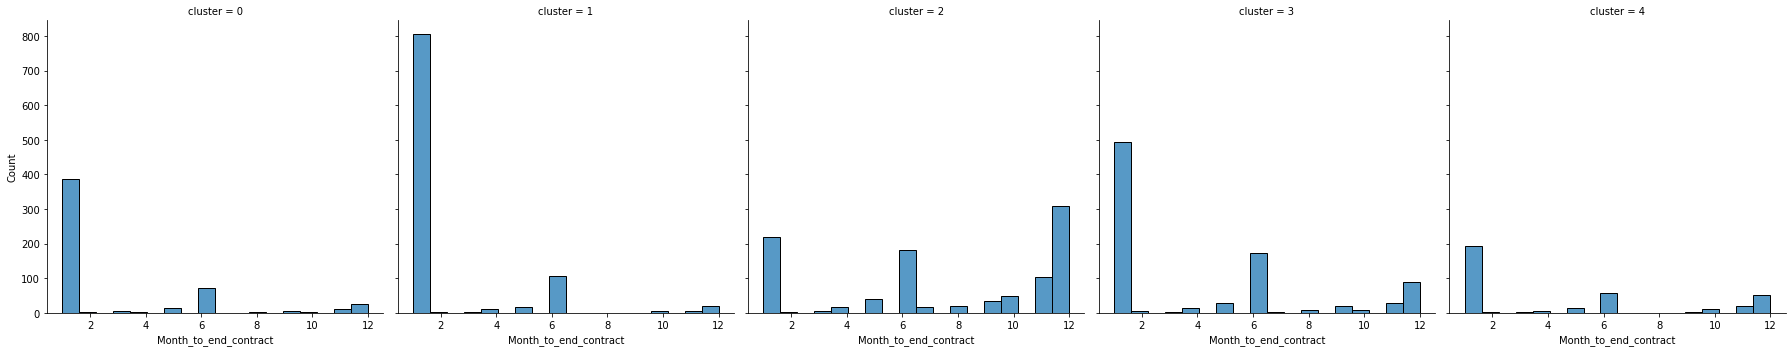

<Figure size 720x720 with 0 Axes>

Lifetime :


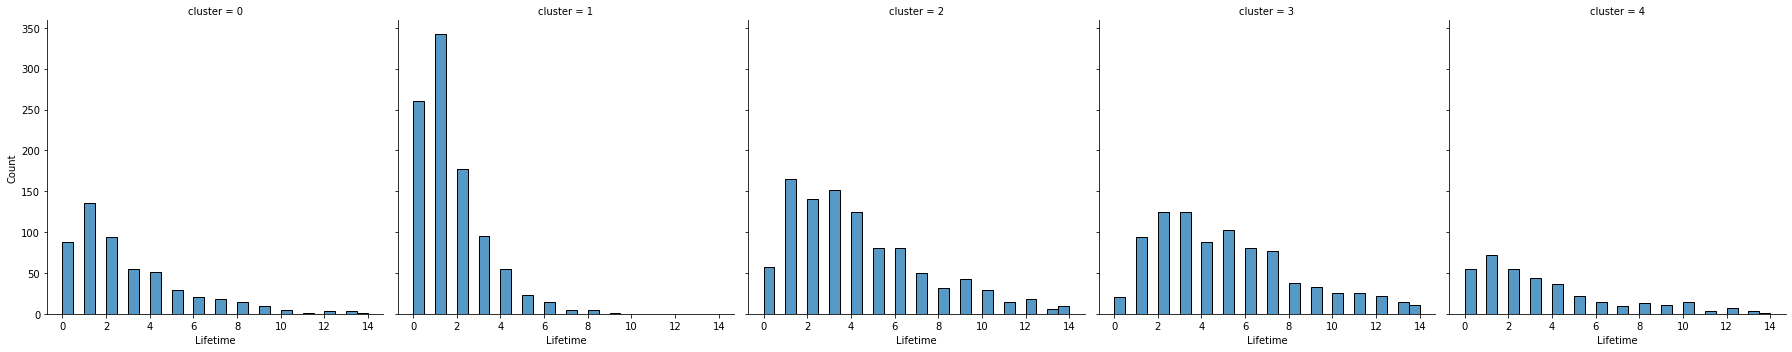

<Figure size 720x720 with 0 Axes>

Avg_class_frequency_total :


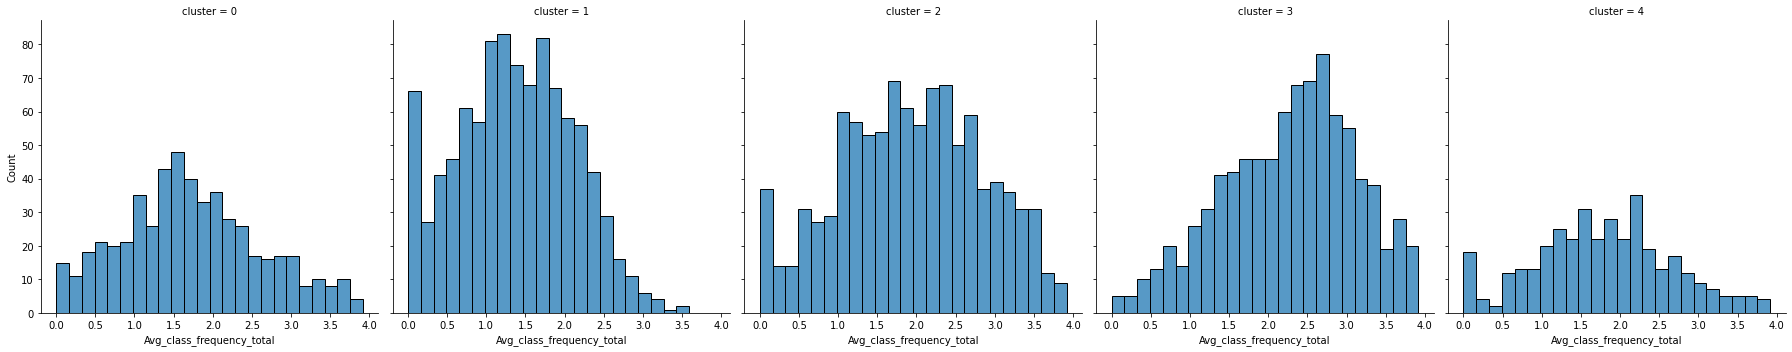

<Figure size 720x720 with 0 Axes>

Avg_class_frequency_current_month :


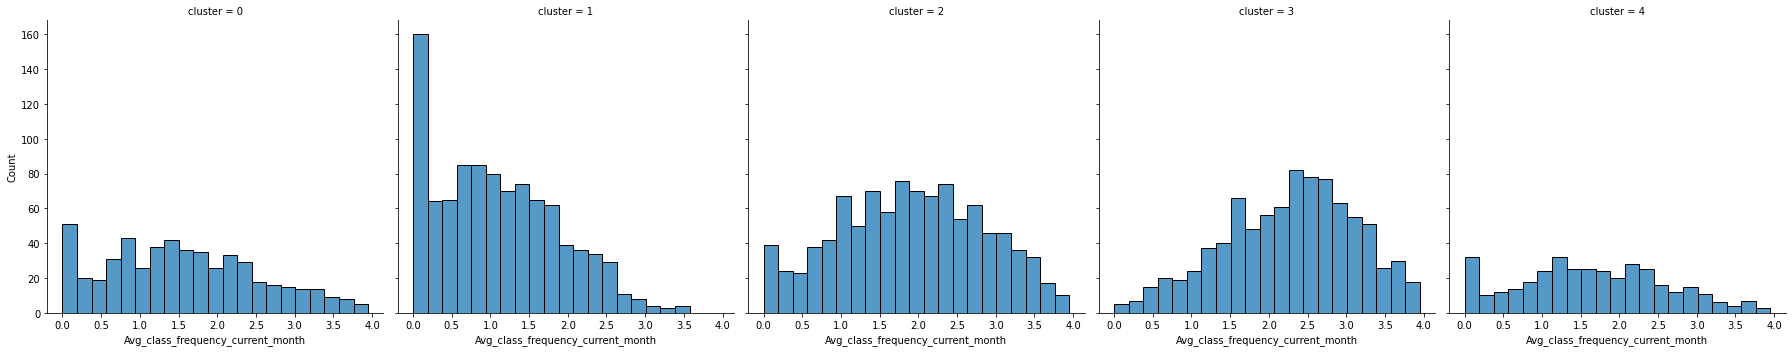

<Figure size 720x720 with 0 Axes>

Churn :


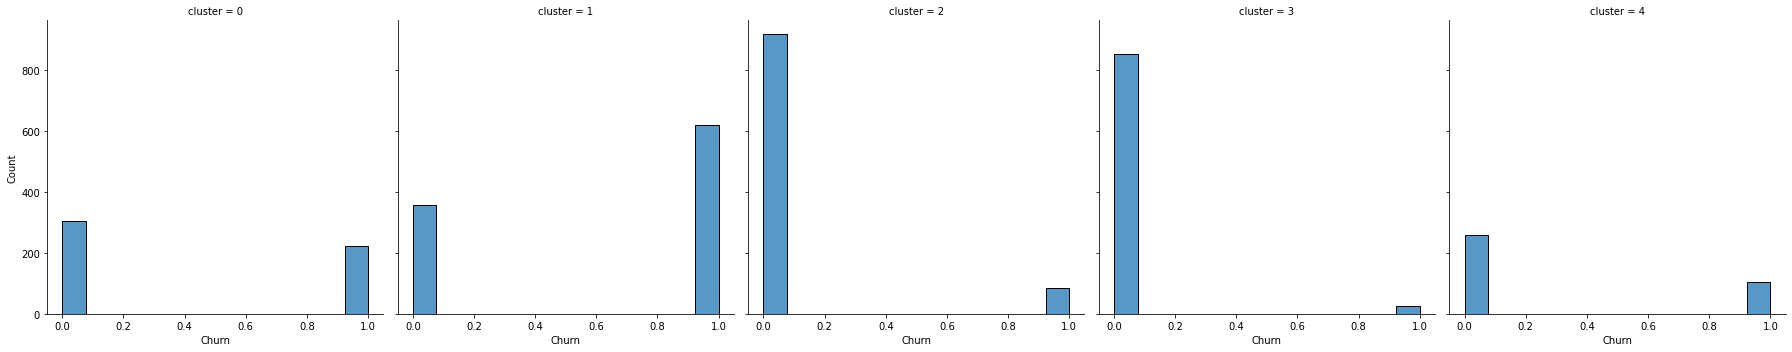

<Figure size 720x720 with 0 Axes>

cluster :


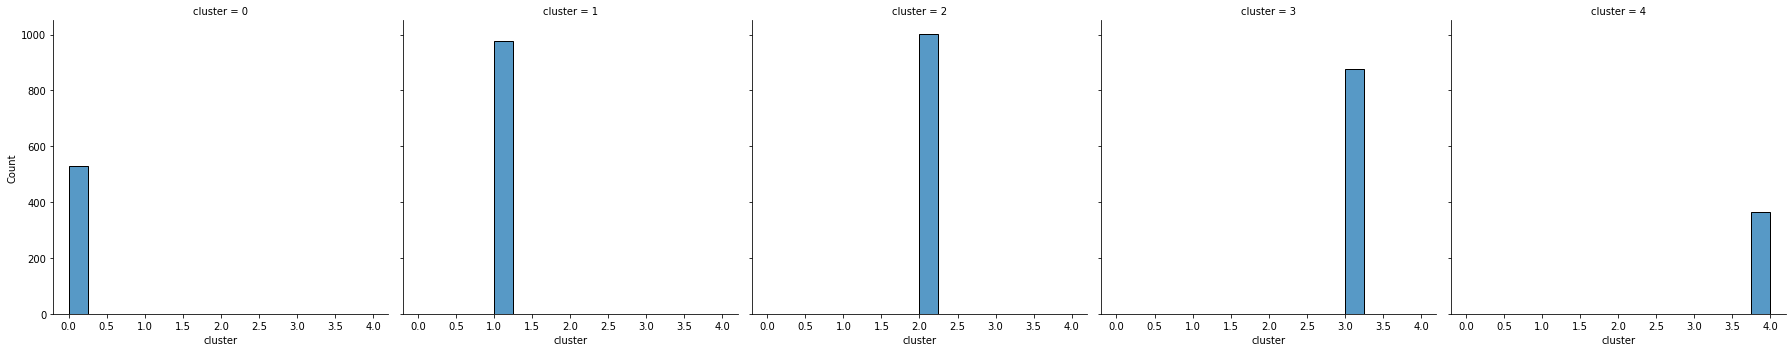

<Figure size 720x720 with 0 Axes>

In [20]:
for i in data.columns:
        print(i,":")
        sns.displot(data = data,x = i, col = 'cluster', palette = 'bright')
        plt.figure(figsize = (10,10))
        plt.show();

We can see that we have 3 large clusters - 1,2 and 3, and 2 smaller ones - 0 and 4. Let's start with cluster 2. We can see that the main characteristics of this cluster are people who came through company deals and in addition through friends deals. This cluster has the longest contarct average, but not the highest lifetime. Cluster 3 dosen't have any main characteristics, But we see it is the leading cluster in many categories - additional charges, group visits and class frequency. We can call this cluster the 'gym loving' cluster. We can clearly see that cluster 4 is the cluster of the people who didn't give their phone number. This cluster seems relativly average in all of the featurs. Cluster 0's main feature is people who live far from the gym. This cluster has the lowest average of attending group meetings. Cluster 1's main characteristic is people with short contract - the vast majority of this cluster has a contract for a month. This cluster is by far the lowest cluster in terms of lifetime, class frequancy and additional payment. 

Let's check the Churn rate for all of the clusters:

In [21]:
churn_data = data.groupby('cluster')['Churn'].mean()
churn_data = churn_data.groupby(level = 0).apply(lambda x: "{:%}".format(float(x)))
churn_data

cluster
0    42.234848%
1    63.496933%
2     8.391608%
3     3.075171%
4    28.374656%
Name: Churn, dtype: object

In [22]:
churn_pivot = data.pivot_table(index = 'cluster', values = 'Churn', aggfunc = 'mean')
for i in churn_pivot.index:
    print("Churn percentage for cluster",i,": {:.2%}".format(churn_pivot['Churn'][i]))

Churn percentage for cluster 0 : 42.23%
Churn percentage for cluster 1 : 63.50%
Churn percentage for cluster 2 : 8.39%
Churn percentage for cluster 3 : 3.08%
Churn percentage for cluster 4 : 28.37%


We can see that the cluster with the lowest churn rate is 3, the "Sports loving" cluster. After them is cluster 2, The cluster of the company and friends deals, who have longer contracts. Cluster 4 has the closest Churn rate to the average with 28%. The 2 clusters that are above average on churn rate are cluster 0 - The long distance cluster, and cluster 1 - the short term customers, with more then half of them leaving.

# Conclusion

Let's sum up what we did in this analysis:
- We downloaded a file about customers, deleted outliners, we checked means and distributions and created a correlation matrix.
- We trained a model that can predict the churn of any specific customer.
- We divided our customers into clusters, studied each cluster's charachteristics and checked the churn rate for each one.

My analysis shows that:
- Customers that come through our companies and friend deals tend to sign longer contracts.
- Sport loving customers engage the most with the gym and have the lowest churn rate.
- Customers with short term contracts tend to engage less with gym activities, and have a massivly high churn rate.
- There are not many customers that live far from the gym, And their churn rate is high.

I can reccomend the following:
1. Increase the company and friend deals - it seems these deals get us long term and loyal customers. Maybe we can ask them to pay the contract in advance, since we see that they have the biggest gap between their contract length and their lifetime.
2. In advertising, target the sport loving community - they pay the most for additional things in the gym and they stay the most.
3. Focus on advertising in billboards close to the gym - These customers prove to stay more.
4. Focus on engaging short term customers to the gym (Reminders on the phone, personal classes etc.). A customer that engages with the gym will have a harder time leaving.